In [16]:
import os

path = '/home/oltrajordi27/data2'
os.listdir(path)

['validation', 'training']

In [21]:
patients = os.listdir(f'{path}/training')
len(patients)

160

In [25]:
patients_list = os.listdir(f'{path}/training/{patients[0]}')
patients_list

['147_LA_ES.nii.gz',
 '147_LA_ED.nii.gz',
 '147_SA_ES_gt.nii.gz',
 '147_LA_CINE.nii.gz',
 '147_SA_CINE.nii.gz',
 '147_LA_ES_gt.nii.gz',
 '147_LA_ED_gt.nii.gz',
 '147_SA_ED_gt.nii.gz',
 '147_SA_ED.nii.gz',
 '147_SA_ES.nii.gz']

In [7]:
!pip install nibabel

In [28]:
import nibabel as nib

import random

ix = random.randint(0,len(patients))

sample = patients[ix]
sample
sample_path = f'{path}/training/{sample}/{sample}_LA_ED.nii.gz'
img = nib.load(sample_path).get_fdata()
img.shape, img.dtype, img.max(), img.min()

((288, 288, 1), dtype('<f8'), 523.0, 0.0)

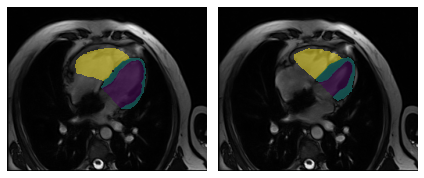

In [29]:
import matplotlib.pyplot as plt
import numpy as np

ix = random.randint(0,len(patients))
mode ='LA_ED'
sample = patients[ix]
modes = ['LA_ED','LA_ES']
fig = plt.figure()
for i, mode in enumerate(modes):
    base_path = f'{path}/training/{sample}/{sample}_{mode}'
    sample_path = f'{base_path}.nii.gz'
    mask_path = f'{base_path}_gt.nii.gz'

    img = nib.load(sample_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()


    ax = plt.subplot(1,2,i+1)
    plt.imshow(img[...,0],cmap='gray')
    mask[mask == 0]=np.nan
    ax.imshow(mask[...,0], alpha =0.5)
    ax.axis('off')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
/opt/conda/lib/python3.7/site-packages/matplotlib/image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


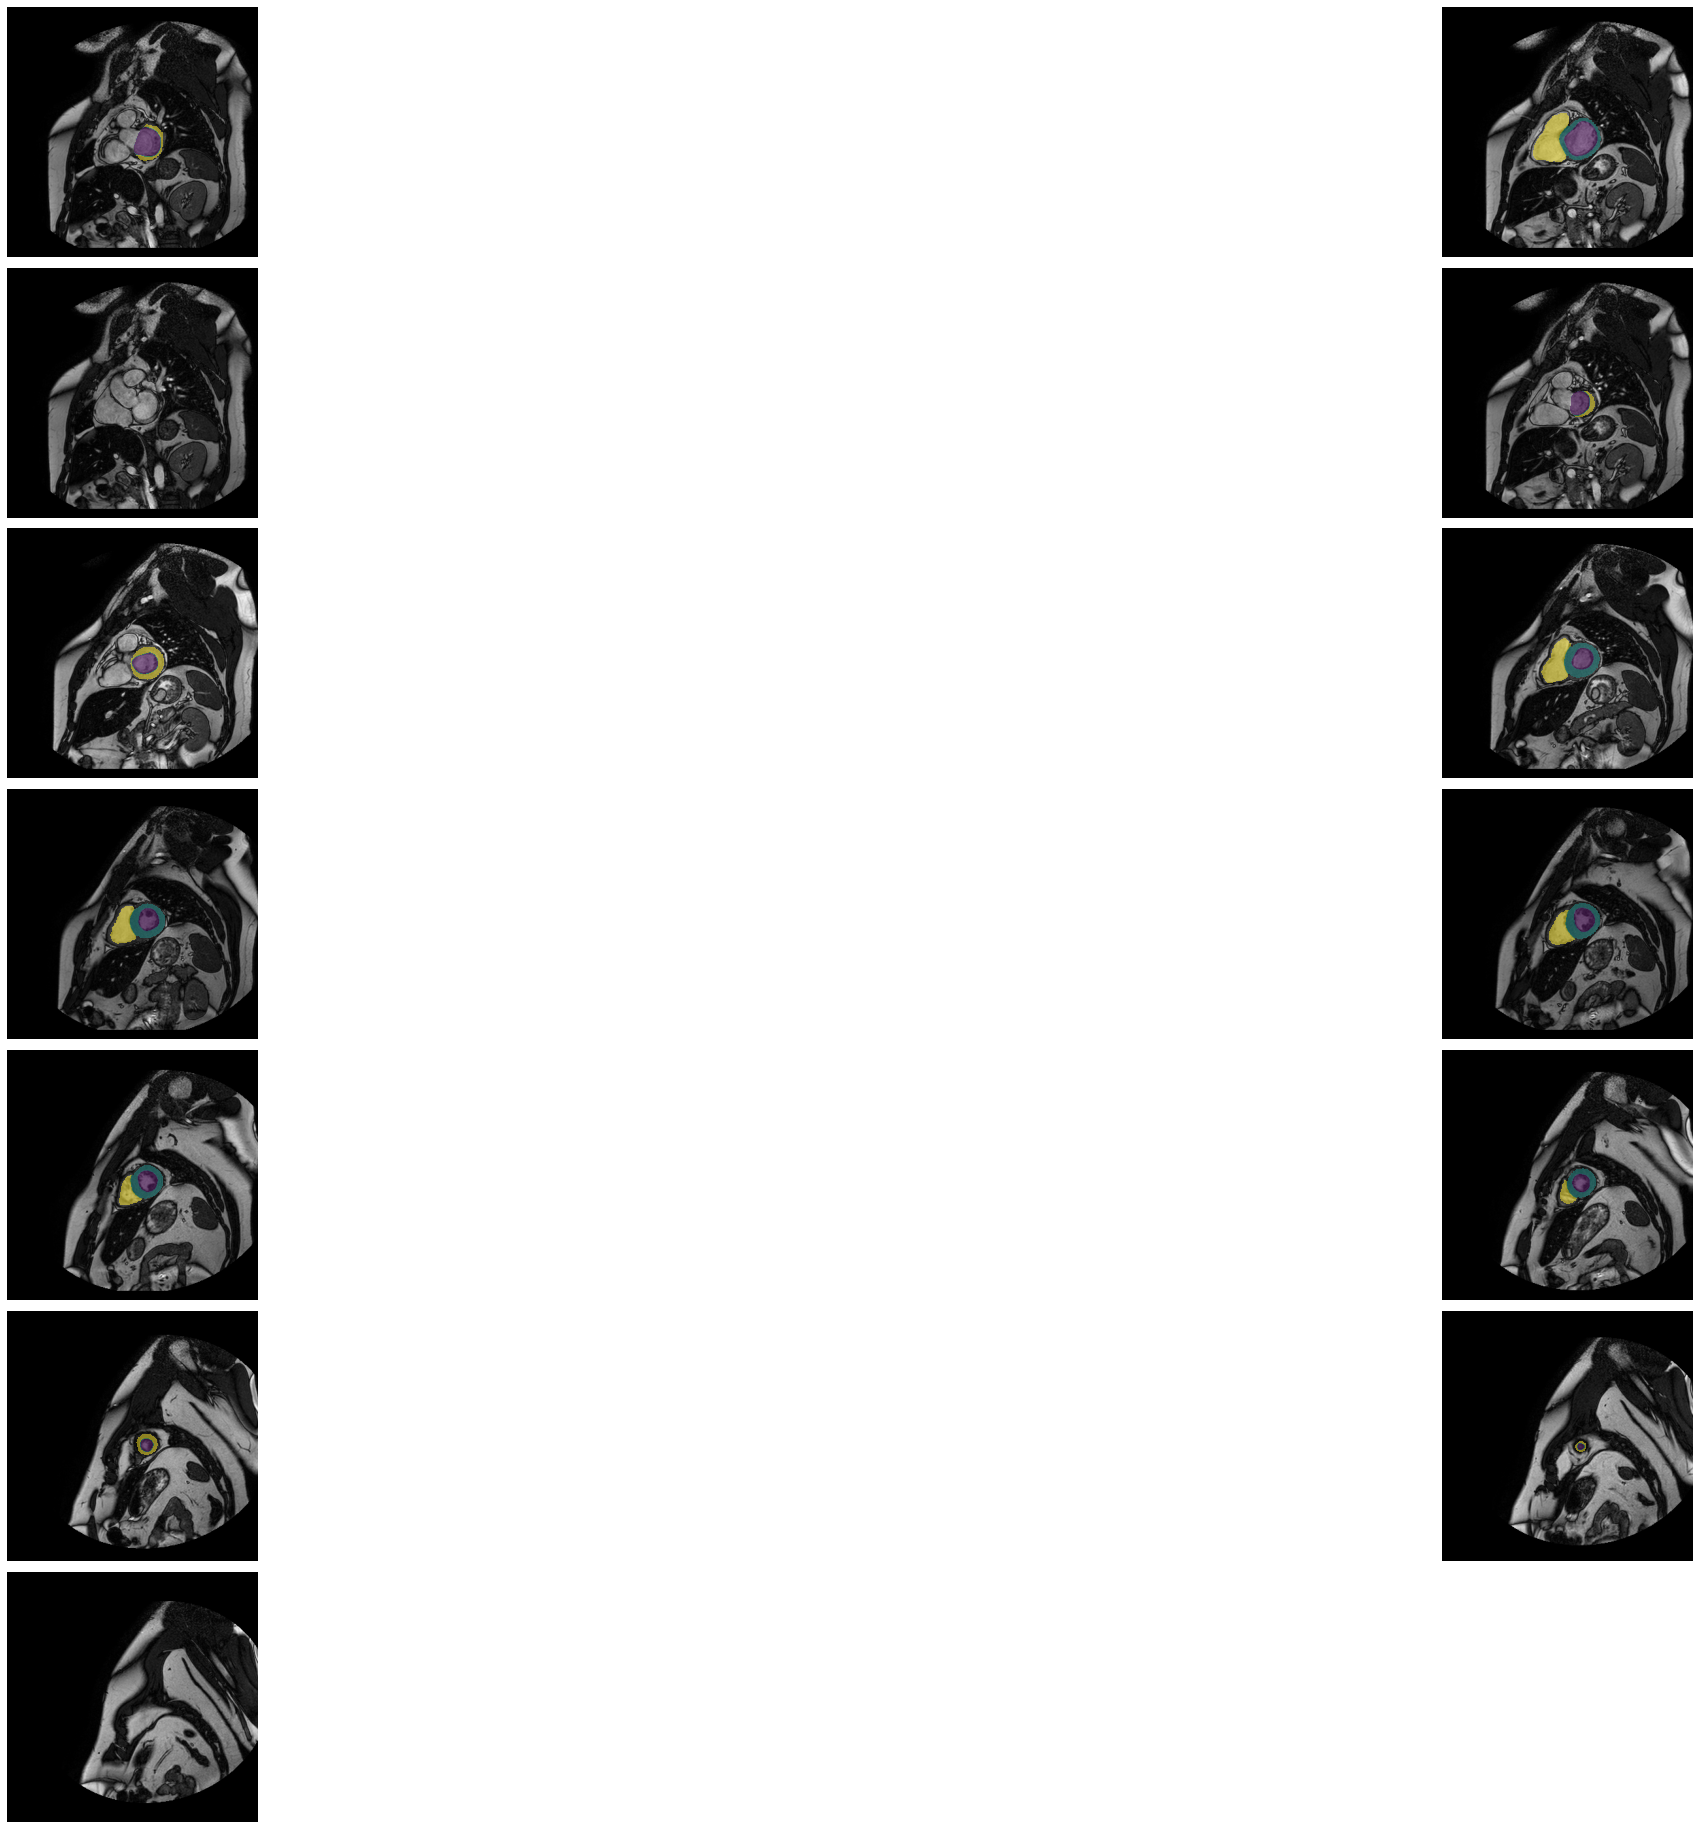

In [30]:
ix = random.randint(0,len(patients))
sample = patients[ix]
modes = ['SA_ED','SA_ES']
fig = plt.figure(figsize=(40,40))
for i, mode in enumerate(modes):
    base_path = f'{path}/training/{sample}/{sample}_{mode}'
    sample_path = f'{base_path}.nii.gz'
    mask_path = f'{base_path}_gt.nii.gz'

    img = nib.load(sample_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()
    channels = img.shape[-1]

    for c in range(channels):
        ax = plt.subplot(channels,2,2*i+1+c)
        plt.imshow(img[...,c],cmap='gray')
        mask[mask == 0]=np.nan
        ax.imshow(mask[...,c], alpha =0.5)
        ax.axis('off')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


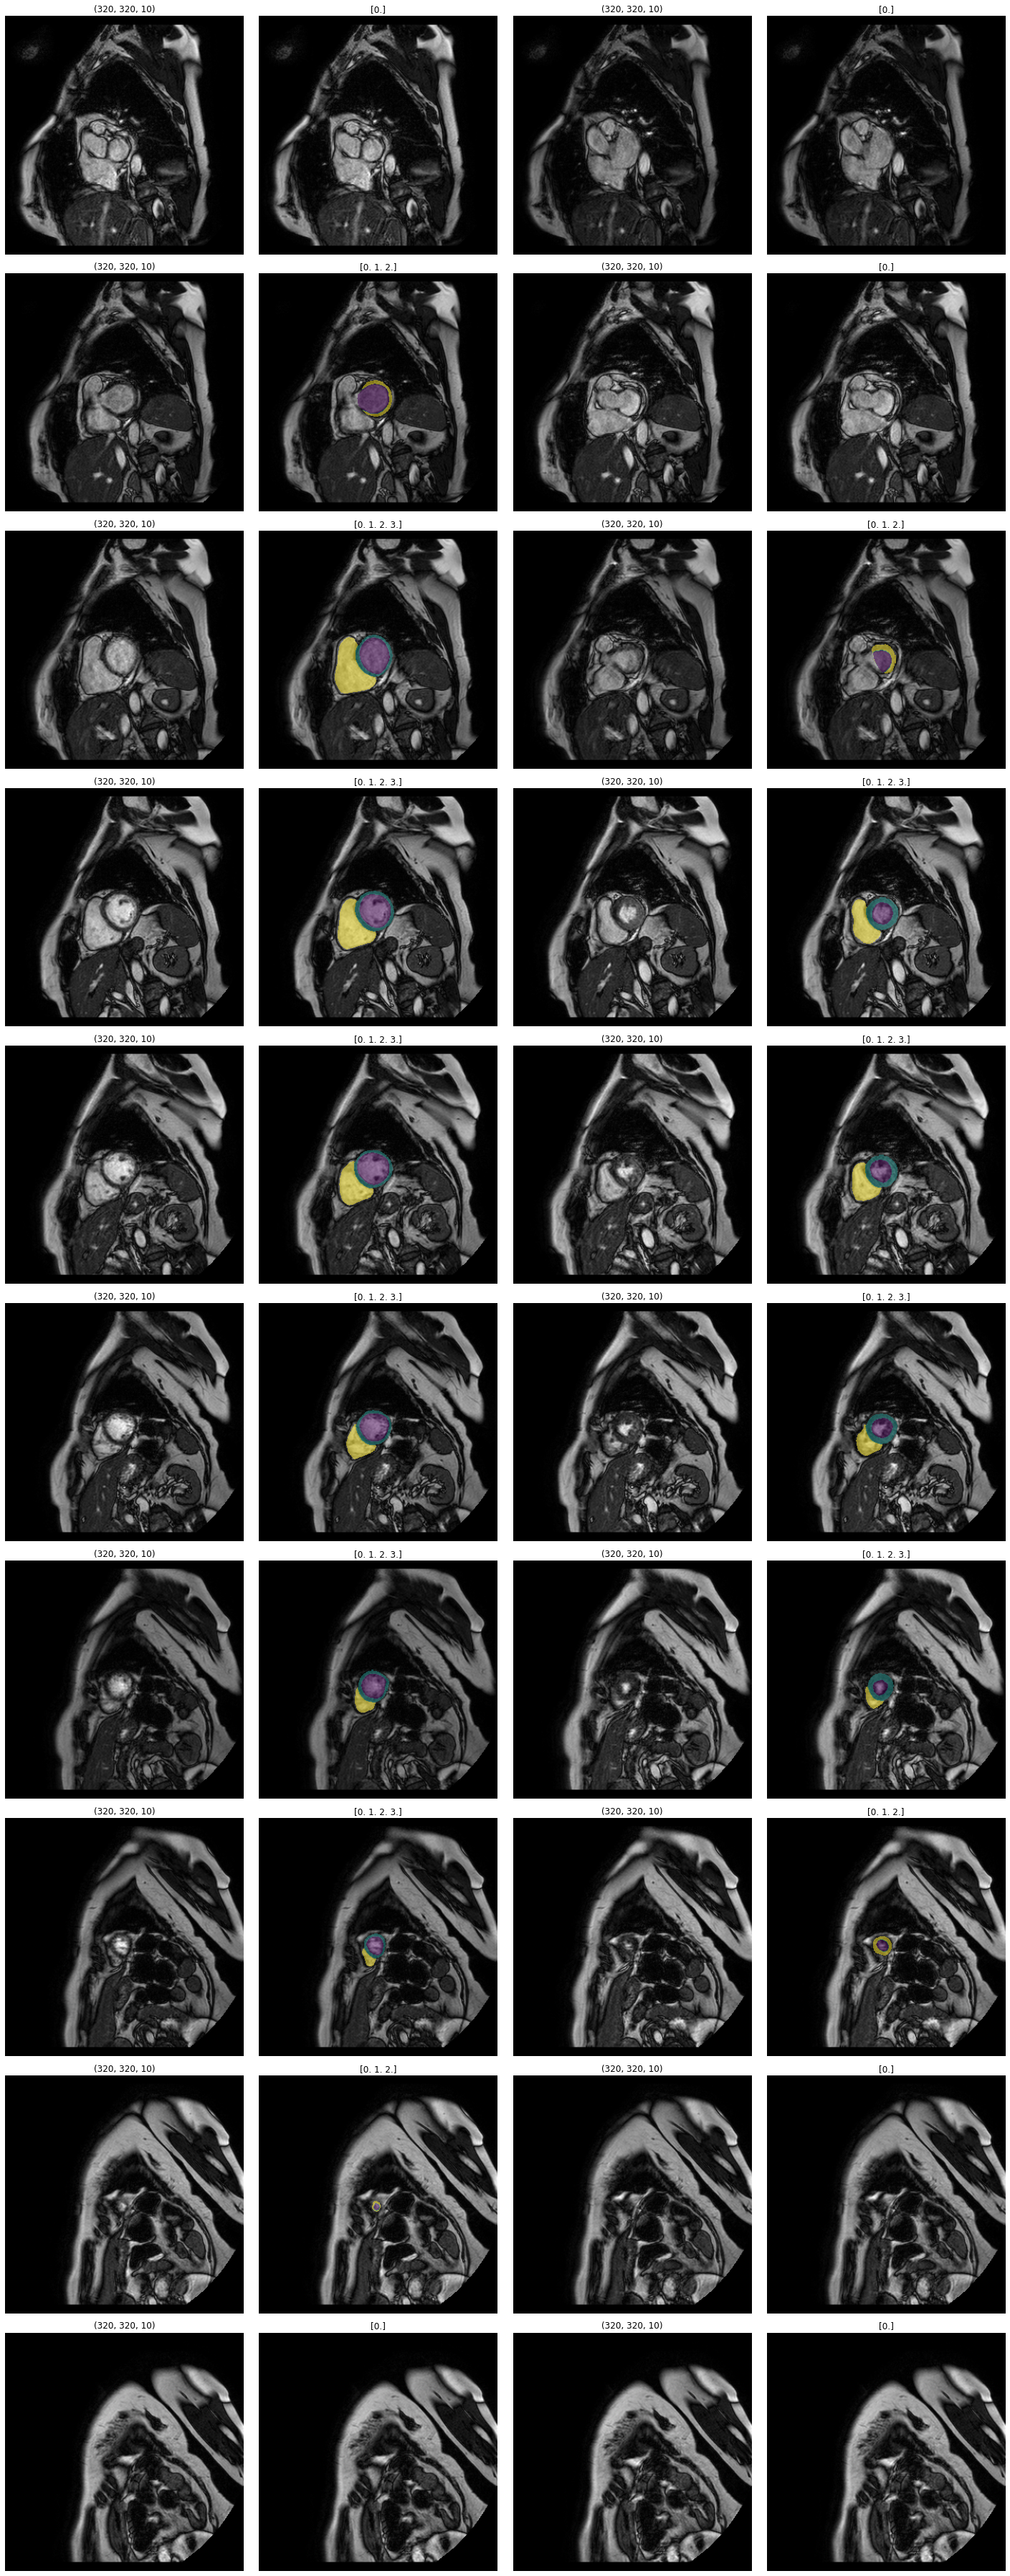

In [31]:

train_path = path + '/training/'
train_data = os.listdir(train_path)

files = ['SA_ED', 'SA_ES']
ix = random.randint(0, len(train_data))
sample = train_data[ix]
    
image_path = f'{train_path}/{sample}/{sample}_SA_ED.nii.gz'
ed_img = nib.load(image_path).get_fdata()
channels = ed_img.shape[-1]

image_path = f'{train_path}/{sample}/{sample}_SA_ED_gt.nii.gz'
ed_mask = nib.load(image_path).get_fdata()
assert channels == ed_mask.shape[-1]

image_path = f'{train_path}/{sample}/{sample}_SA_ES.nii.gz'
es_img = nib.load(image_path).get_fdata()
assert channels == es_img.shape[-1]

image_path = f'{train_path}/{sample}/{sample}_SA_ES_gt.nii.gz'
es_mask = nib.load(image_path).get_fdata()
assert channels == es_mask.shape[-1]

fig = plt.figure(figsize=(20, channels*5))
for c in range(channels):
    ax = plt.subplot(channels, 4, 4*c + 1)
    ax.imshow(ed_img[...,c],cmap='gray')
    ax.axis('off')
    ax.set_title(ed_img.shape)
    ax = plt.subplot(channels, 4, 4*c + 2)
    ax.imshow(ed_img[...,c], cmap='gray')
    mask = ed_mask[...,c]
    ax.set_title(np.unique(mask))
    mask[mask == 0] = np.nan
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')
    ax = plt.subplot(channels, 4, 4*c + 3)
    ax.imshow(es_img[...,c],cmap='gray')
    ax.axis('off')
    ax.set_title(es_img.shape)
    ax = plt.subplot(channels, 4, 4*c + 4)
    ax.imshow(es_img[...,c], cmap='gray')
    mask = es_mask[...,c]
    ax.set_title(np.unique(mask))
    mask[mask == 0] = np.nan
    ax.imshow(mask, alpha=0.5)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [33]:
from tqdm import tqdm
data = {
    'patient': [],
    'image': [],
    'channel': []
}

for patient in tqdm(sorted(train_data)):
    for f in files:
        image_path = f'{train_path}/{patient}/{patient}_{f}.nii.gz'
        img = nib.load(image_path)
        channels = img.shape[-1]
        for channel in range(channels):
            data['patient'] += [patient]
            data['image'] += [f]
            data['channel'] += [channel]

100%|██████████| 160/160 [00:00<00:00, 697.15it/s]


In [34]:
import pandas as pd 

df = pd.DataFrame(data)
df

,patient,image,channel
0,001,SA_ED,0
1,001,SA_ED,1
2,001,SA_ED,2
3,001,SA_ED,3
4,001,SA_ED,4
...,...,...,...
3549,160,SA_ES,2
3550,160,SA_ES,3
3551,160,SA_ES,4
3552,160,SA_ES,5
